In [13]:
# !python -m pip install --upgrade seaborn

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Simulation\\Simulation 1.csv")
df

,Run Number,Catastrophe Point Found?,Fundamentalists Initialised,Speculators Initialised,Speculators Added/Removed Per Cycle,Num Cycle,Cool off Per Cycle,Speculator Proportion at CUSP,Market Price at CUSP,Excess Demand,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Overall Sim Volatility,Pre-CUSP Market Price Difference,Last 100 Pre-CUSP Market Prices Difference,Total Trades,Catastrophe Point Index
0,1,True,900,1600,1,45,1,64.84%,55.65,-279,-0.22202,-0.83038,-1.20204,0.541,0.502,6.888,129.70,17.20,112500,54673
1,2,True,900,1600,1,45,1,64.92%,92.90,-524,-0.30645,-1.15019,-1.19816,0.861,NaN,6.030,112.85,13.35,112500,58933
2,3,True,900,1600,1,45,1,65.0%,67.00,-793,-0.43008,-1.03311,-1.20093,0.691,0.548,6.366,111.45,11.35,112500,64589
3,4,True,900,1600,1,45,1,64.84%,54.85,-349,0.39504,-0.17692,-1.19961,0.570,0.577,6.041,116.65,15.60,112500,54330
4,5,False,900,1600,1,45,1,64.0%,0.00,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,True,900,1600,1,45,1,64.96%,76.15,-277,-0.39566,-1.50970,-1.20265,0.499,0.518,6.216,103.00,12.15,112500,62339
996,997,True,900,1600,1,45,1,64.92%,91.75,-245,0.90163,-1.26552,-1.19940,0.490,NaN,6.377,108.45,12.85,112500,58053
997,998,True,900,1600,1,45,1,65.24%,60.60,-249,-0.91431,-0.99429,-1.19953,1.014,NaN,5.979,115.65,10.30,112500,79249
998,999,True,900,1600,1,45,1,65.0%,60.45,-198,-0.54643,-0.56852,-1.20212,0.516,NaN,6.621,116.10,9.15,112500,64788


In [15]:
df_filtered = df[df['Catastrophe Point Found?'] == True]
df_filtered['Speculator Proportion at CUSP'] = df_filtered['Speculator Proportion at CUSP'].str.rstrip('%').astype('float') / 100

columns_of_interest = [
    'Total Trades', 'Catastrophe Point Index', 'Num Cycle',
    'Speculator Proportion at CUSP', 'Market Price at CUSP', 'Excess Demand', 
    'Kurtosis MP', 'Kurtosis ED', 'Kurtosis SP', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Overall Sim Volatility', 
    'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

summary_stats = df_filtered[columns_of_interest].agg(['mean', 'min', 'max'])
summary_stats

C:\Users\Ricky\AppData\Local\Temp\ipykernel_15432\366233923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Speculator Proportion at CUSP'] = df_filtered['Speculator Proportion at CUSP'].str.rstrip('%').astype('float') / 100


,Total Trades,Catastrophe Point Index,Num Cycle,Speculator Proportion at CUSP,Market Price at CUSP,Excess Demand,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Overall Sim Volatility,Pre-CUSP Market Price Difference,Last 100 Pre-CUSP Market Prices Difference
mean,112500.0,62399.708241,45.0,0.649764,72.354955,-426.811804,-0.205872,-0.759794,-1.199973,1.149088,0.832017,6.37169,110.853118,14.278285
min,112500.0,40060.000000,45.0,0.646400,52.550000,-1511.000000,-1.518460,-1.757980,-1.207720,0.466000,0.000000,5.08600,85.050000,2.200000
max,112500.0,96874.000000,45.0,0.655200,95.600000,-82.000000,2.934360,8.492990,-1.195470,30.005000,30.367000,7.60100,134.200000,41.900000


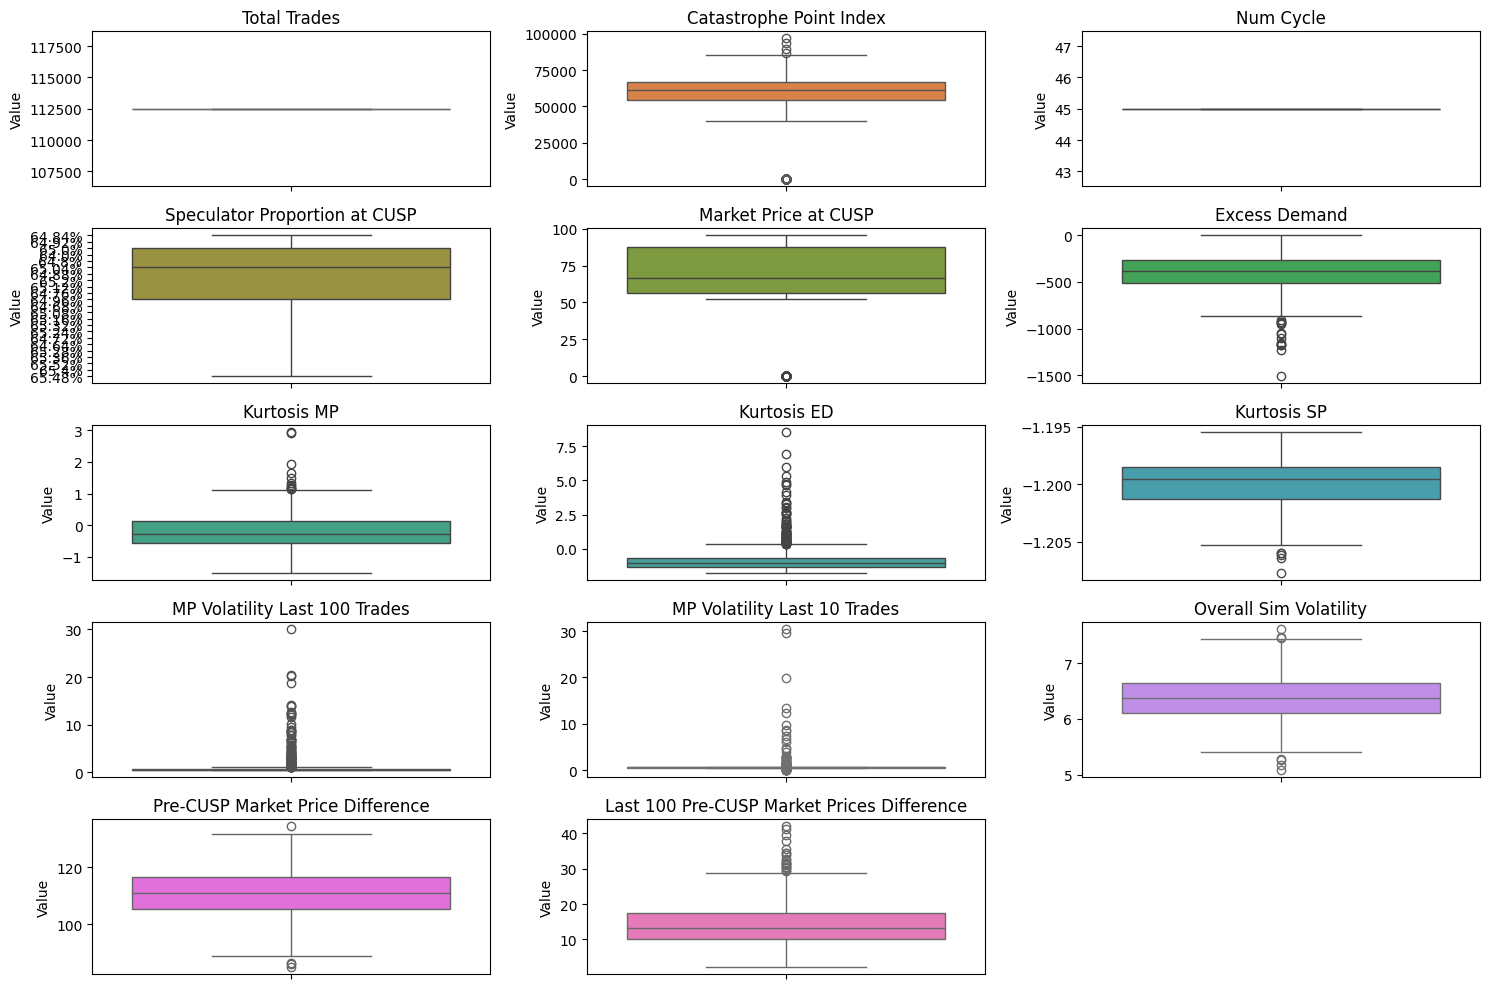

In [16]:
colors = sns.color_palette('husl', len(columns_of_interest)) 

n_cols = 3  
n_rows = (len(columns_of_interest) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10)) 
axes = axes.flatten()  

for i, column in enumerate(columns_of_interest):
    sns.boxplot(data=df, y=column, ax=axes[i], color=colors[i])  
    axes[i].set_title(column) 
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('Value')  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()